In [10]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
def string_to_list(string):
    """
    Converts a string representation of a list with missing commas into a list of floats.
    """
    cleaned = string.strip('[]').split(' ')
    return [float(item) for item in cleaned if item]

In [ ]:
# Load the data from the CSV files
file_paths = [
    '../runs/artifacts/eval_results/cnn/alexnet.csv',
    '../runs/artifacts/eval_results/cnn/vgg16.csv',
    '../runs/artifacts/eval_results/cnn/resnet50.csv',
    '../runs/artifacts/eval_results/cnn/densenet121.csv',
    '../runs/artifacts/eval_results/cnn/efficientnet.csv',
    '../runs/artifacts/eval_results/sam/bce/1c/sam.csv',
]

# Read the data into a dictionary
models_data = {}
for path in file_paths:
    model_name = path.split('/')[-1].split('.')[0]  # Extract model name from file path
    models_data[model_name] = pd.read_csv(path)

# Plot each model's ROC curve again with corrected data
plt.figure(figsize=[10,8])
for model, data in models_data.items():
    # Correct the format and convert the string lists to actual lists
    tpr = string_to_list(data['TPR'].values[0])
    fpr = string_to_list(data['FPR'].values[0])
    # Plot
    plt.plot(fpr, tpr, label=f"{model} (AUC = {data['auc'].values[0]:.3f})")

# Plot formatting
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid(True)

plt.savefig("ROC.jpg")

# Display the plot
plt.show()

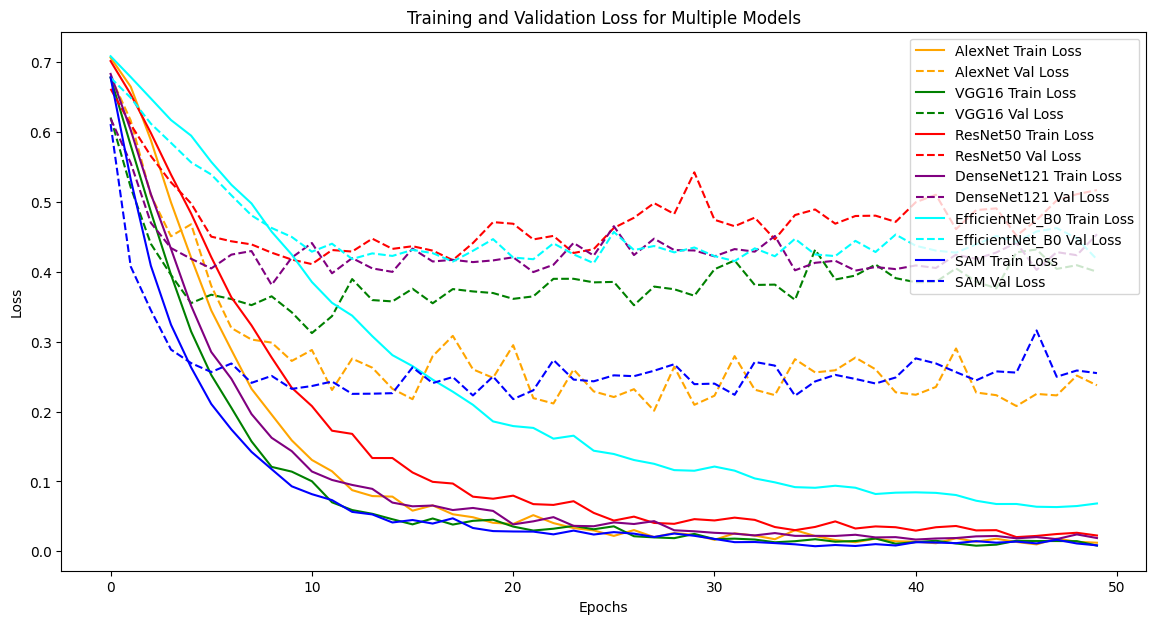

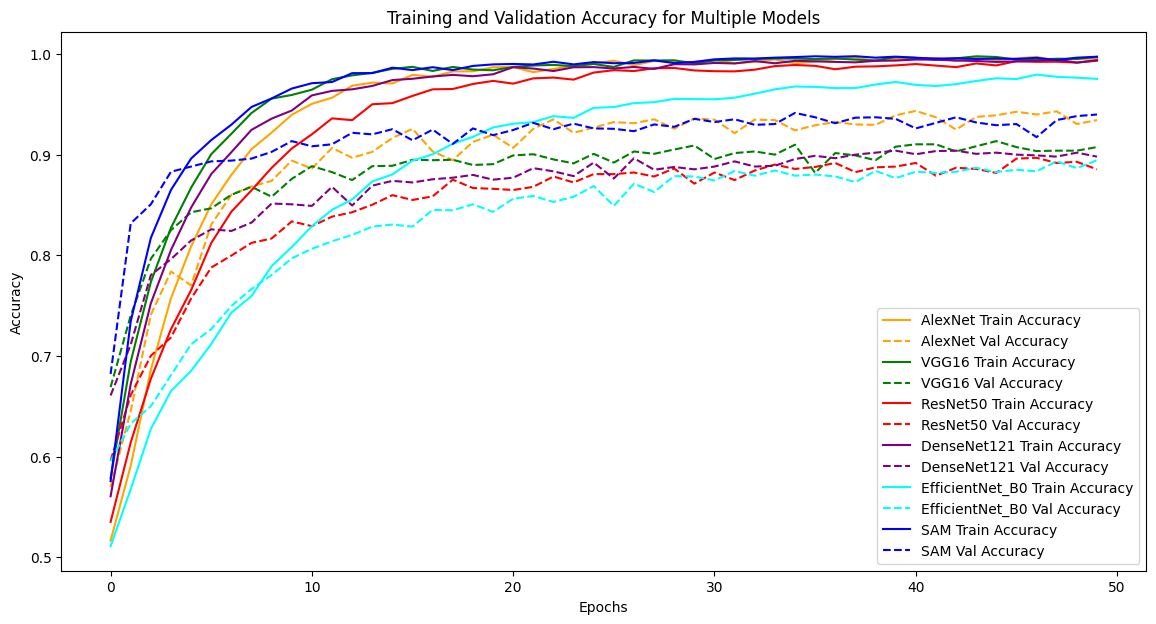

In [17]:
# Paths
train_paths = {
    'AlexNet': '../runs/artifacts/alexnet/train.csv',
    'VGG16': '../runs/artifacts/vgg/train.csv',
    'ResNet50': '../runs/artifacts/resnet/train.csv',
    'DenseNet121': '../runs/artifacts/densenet/train.csv',
    'EfficientNet_B0': '../runs/artifacts/efficientnet/train.csv',
    'SAM': '../runs/artifacts/sam/bce/1c/train.csv'
}
val_paths = {
    'AlexNet': '../runs/artifacts/alexnet/val.csv',
    'VGG16': '../runs/artifacts/vgg/val.csv',
    'ResNet50': '../runs/artifacts/resnet/val.csv',
    'DenseNet121': '../runs/artifacts/densenet/val.csv',
    'EfficientNet_B0': '../runs/artifacts/efficientnet/val.csv',
    'SAM': '../runs/artifacts/sam/bce/1c/val.csv'
}

# Load the train and val data (loss and accuracy)
train_data = {name: pd.read_csv(path) for name, path in train_paths.items()}
val_data = {name: pd.read_csv(path) for name, path in val_paths.items()}

# Colors for each model
colors = {
    'AlexNet': 'orange',
    'VGG16': 'green',
    'ResNet50': 'red',
    'DenseNet121': 'purple',
    'EfficientNet_B0': 'cyan',
    'SAM': 'blue'
}

# Plotting train and val loss
plt.figure(figsize=(14, 7))
for name in train_data.keys():
    plt.plot(train_data[name]['epoch'], train_data[name]['loss'], label=f'{name} Train Loss', color=colors[name])
    plt.plot(val_data[name]['epoch'], val_data[name]['loss'], label=f'{name} Val Loss', linestyle='dashed', color=colors[name])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss for Multiple Models')
plt.legend()
plt.savefig('loss.jpg')
plt.show()

# Plotting train and val accuracy
plt.figure(figsize=(14, 7))
for name in train_data.keys():
    plt.plot(train_data[name]['epoch'], train_data[name]['acc'], label=f'{name} Train Accuracy', color=colors[name])
    plt.plot(val_data[name]['epoch'], val_data[name]['acc'], label=f'{name} Val Accuracy', linestyle='dashed', color=colors[name])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy for Multiple Models')
plt.legend()
plt.savefig('accuracy.jpg')
plt.show()
